# DSCI 573 - Feature and Model Selection

# Lab 4: A mini project - Putting it all together

## Table of contents
0. [Submission instructions](#si) (4%)
1. [Understanding the problem](#1) (4%)
2. [Data splitting](#2) (2%)
3. [EDA](#3) (10%)
4. (Optional) [Feature engineering](#4)
5. [Preprocessing and transformations](#5) (10%)
6. [Baseline model](#6) (2%)
7. [Linear models](#7) (10%)
8. [Different models](#8) (16%)
9. (Optional) [Feature selection](#9)
10. [Hyperparameter optimization](#10) (10%)
11. [Interpretation and feature importances](#11) (10%)
12. [Results on the test set](#12) (10%)
13. [Summary of the results](#13) (12%)
15. (Optional) [Reproducible data analysis pipeline](#14)
15. (Optional) [Your takeaway from the course](#15)

## Submission instructions <a name="si"></a>
<hr>
rubric={mechanics:4}

You will receive marks for correctly submitting this assignment. To submit this assignment, follow the instructions below:

- **Which problem did you pick, classification or regression? Classification**
- **Report your test score here along with the metric used: Test score: 0.53 / Metric: F1** 
- **Please add a link to your GitHub repository here: https://github.com/nobbynguyen/573Lab4_Classification_Group_GSN** 
- **You don't have to but you may work on this assignment in a group (group size <= 4) and submit your assignment as a group.** 
- Below are some instructions on working as a group.  
    - The maximum group size is 4. 
    - You can choose your own group members. Since I don't know your groups in advance, I am not opening this lab as a group lab. So you all will have a separate GitHub repository for your labs and you'll have to decide how you want to collaborate. 
    - Use group work as an opportunity to collaborate and learn new things from each other. 
    - Be respectful to each other and make sure you understand all the concepts in the assignment well. 
    - It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. [Here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members) are some instructions on adding group members in Gradescope.  
- Be sure to follow the [general lab instructions](https://ubc-mds.github.io/resources_pages/general_lab_instructions/).
- Make at least three commits in your lab's GitHub repository.
- Push the final .ipynb file with your solutions to your GitHub repository for this lab.
- Upload the .ipynb file to Gradescope.
- If the .ipynb file is too big or doesn't render on Gradescope for some reason, also upload a pdf or html in addition to the .ipynb. 
- Make sure that your plots/output are rendered properly in Gradescope.

> [Here](https://github.com/UBC-MDS/public/tree/master/rubric) you will find the description of each rubric used in MDS.

> As usual, do not push the data to the repository. 

## Imports

In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.impute import SimpleImputer
from sklearn.metrics import (
    accuracy_score,
    auc,
    average_precision_score,
    classification_report,
    confusion_matrix,
    f1_score,
    make_scorer,
    precision_score,
    recall_score,
)

from sklearn.model_selection import (
    cross_val_score,
    cross_validate,
    train_test_split,
)

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.tree import DecisionTreeRegressor, export_graphviz

%matplotlib inline

## Introduction <a name="in"></a>

In this lab you will be working on an open-ended mini-project, where you will put all the different things you have learned so far in 571 and 573 together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips
1. This mini-project is open-ended, and while working on it, there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 

#### Assessment
We plan to grade fairly and leniently. We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you do a bunch of sane things and get a lower accuracy than your friend, don't sweat it.


#### A final note
Finally, this style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "a few hours" (2-8 hours???) is a good guideline for a typical submission. Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and I hope you enjoy it as well. 

<br><br>

## 1. Pick your problem and explain what exactly you are trying to predict <a name="1"></a>
<hr>
rubric={reasoning:4}

In this mini project, you will pick one of the following problems: 

- A classification problem of predicting whether a credit card client will default or not. For this problem, you will use [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). In this data set, there are 30,000 examples and 24 features, and the goal is to estimate whether a person will default (fail to pay) their credit card bills; this column is labeled "default.payment.next.month" in the data. The rest of the columns can be used as features. You may take some ideas and compare your results with [the associated research paper](https://www.sciencedirect.com/science/article/pii/S0957417407006719), which is available through [the UBC library](https://www.library.ubc.ca/). 

OR 

- A regression problem of predicting `reviews_per_month`, as a proxy for the popularity of the listing with [New York City Airbnb listings from 2019 dataset](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data). Airbnb could use this sort of model to predict how popular future listings might be before they are posted, perhaps to help guide hosts create more appealing listings. In reality they might instead use something like vacancy rate or average rating as their target, but we do not have that available here.

**Your tasks:**

1. Spend some time understanding the problem and what each feature means. Write a few sentences on your initial thoughts on the problem and the dataset. 
2. Download the dataset and read it as a pandas dataframe. 
3. Carry out any preliminary preprocessing, if needed (e.g., changing feature names, handling of NaN values etc.)

**Q1 - Answer**:
- The data set is about credit transactions of credit card clients in Taiwan from April 2005 to September 2005.
- The problem is to predict whether a credit card client will default (fail to pay) the credit card bills.
- The target column is `default.payment.next.month` with 2 values: 1 = yes, 0 = no. 
- The following 23 features can be used as explanatory variables:
    - LIMIT_BAL: Amount of the given credit (NT dollar)
    - SEX: Gender (1 = male, 2 = female)
    - EDUCATION: Education level (1 = graduate school, 2 = university, 3 = high school, 4 = others, 5 or 6 = unknown)
    - MARRIAGE: Marital status (1 = married, 2 = single, 3 = others)
    - AGE: Age (years)
    - PAY_0 – PAY_6: Status of past monthly payment (-1 = pay duly, 1 = payment delay for one month,..., 9 = payment delay for nine months and above), where PAY_0 = repayment status in September 2005,..., PAY_6 = repayment status in April 2005. 
    - BILL_AMT1 – BILL_AMT6: Amount of bill statement (NT dollar) from September 2005 to April 2005, respectively.
    - PAY_AMT1 – PAY_AMT6: Amount of previous statement (NT dollar) from September 2005 to April 2005, respectively.

In [2]:
# 2. Read in the data
credit_card_df = pd.read_csv("UCI_Credit_Card.csv")
credit_card_df.sort_index()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


**Q3 - Answer**: Based on the results of `.info()` and `.describe()` below, we can see that there are no missing values in the data set, and feature names are quite standard except that the repayment status columns are `PAY_0`, `PAY_2`, etc. with no `PAY_1`). Hence, besides renaming column `PAY_0` to `PAY_1`, there is no need to do any other preliminary preprocessing.

In [3]:
credit_card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [4]:
credit_card_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


In [5]:
credit_card_df = credit_card_df.rename(columns={"PAY_0": "PAY_1"})
credit_card_df.sort_index()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


<br><br>

## 2. Data splitting <a name="2"></a>
<hr>
rubric={reasoning:2}

**Your tasks:**

1. Split the data into train and test portions.

> Make decision on the `test_size` based on the capacity of your laptop. Don't forget to use a random state.  

**Answer:**

In [6]:
train_df, test_df = train_test_split(credit_card_df, test_size=0.3, random_state=123)

In [7]:
train_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
16395,16396,320000.0,2,1,2,36,0,0,0,0,...,19370.0,10155.0,3788.0,5000.0,5018.0,1000.0,3000.0,0.0,7013.0,0
21448,21449,440000.0,2,1,2,30,-1,-1,-1,0,...,171244.0,150897.0,117870.0,612.0,87426.0,130007.0,3018.0,15000.0,51663.0,0
20034,20035,160000.0,2,3,1,44,-2,-2,-2,-2,...,-18.0,-18.0,-18.0,0.0,0.0,0.0,0.0,0.0,0.0,0
25755,25756,120000.0,2,2,1,30,0,0,0,0,...,103058.0,71095.0,47379.0,3706.0,5502.0,4204.0,3017.0,2005.0,1702.0,0
1438,1439,50000.0,1,2,2,54,1,2,0,0,...,27585.0,27910.0,27380.0,0.0,1400.0,1200.0,1500.0,1000.0,1500.0,0


In [8]:
train_df.shape

(21000, 25)

In [9]:
X_train, y_train = train_df.drop(columns=["default.payment.next.month"]), train_df["default.payment.next.month"]
X_test, y_test = test_df.drop(columns=["default.payment.next.month"]), test_df["default.payment.next.month"]

<br><br>

## 3. EDA <a name="3"></a>
<hr>
rubric={viz:4,reasoning:6}

**Your tasks:**

1. Perform exploratory data analysis on the train set.
2. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
3. Summarize your initial observations about the data. 
4. Pick appropriate metric/metrics for assessment. 

**Answer:**

For EDA, we first look at the correlation among all features.

In [10]:
cor_all = train_df.corr()
cor_all

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
ID,1.000000,0.028419,0.019014,0.040633,-0.024071,0.021795,-0.029574,-0.011899,-0.017471,-0.000293,...,0.042005,0.020323,0.019477,0.013488,0.013389,0.036544,0.010153,-0.000093,0.001252,-0.017861
LIMIT_BAL,0.028419,1.000000,0.027466,-0.223207,-0.115202,0.146419,-0.271686,-0.299924,-0.289222,-0.269399,...,0.297468,0.299353,0.293757,0.191669,0.183705,0.206416,0.204308,0.215244,0.215337,-0.149247
SEX,0.019014,0.027466,1.000000,0.012307,-0.033413,-0.091890,-0.061038,-0.073214,-0.068192,-0.063772,...,-0.022471,-0.015973,-0.015158,0.001324,0.000908,-0.008136,0.001473,-0.004470,-0.001600,-0.046320
EDUCATION,0.040633,-0.223207,0.012307,1.000000,-0.142499,0.175042,0.111222,0.125907,0.118096,0.110732,...,0.003286,-0.005203,-0.005595,-0.039769,-0.028295,-0.039621,-0.038918,-0.031589,-0.038563,0.026558
MARRIAGE,-0.024071,-0.115202,-0.033413,-0.142499,1.000000,-0.414446,0.016416,0.023994,0.035001,0.031905,...,-0.028532,-0.031878,-0.027376,-0.001337,-0.005287,-0.002401,-0.014206,-0.000819,-0.007532,-0.021735
AGE,0.021795,0.146419,-0.091890,0.175042,-0.414446,1.000000,-0.032232,-0.045343,-0.050597,-0.047465,...,0.061071,0.059023,0.058003,0.023255,0.023572,0.034136,0.025197,0.028544,0.017527,0.010715
PAY_1,-0.029574,-0.271686,-0.061038,0.111222,0.016416,-0.032232,1.000000,0.670967,0.571947,0.534071,...,0.172808,0.175548,0.173661,-0.076790,-0.071744,-0.074217,-0.065880,-0.053086,-0.063282,0.325102
PAY_2,-0.011899,-0.299924,-0.073214,0.125907,0.023994,-0.045343,0.670967,1.000000,0.770190,0.664641,...,0.218033,0.216657,0.216919,-0.076280,-0.057781,-0.055477,-0.052057,-0.033231,-0.039994,0.265160
PAY_3,-0.017471,-0.289222,-0.068192,0.118096,0.035001,-0.050597,0.571947,0.770190,1.000000,0.779639,...,0.221998,0.219870,0.218656,0.002073,-0.068541,-0.054288,-0.052475,-0.035079,-0.043431,0.240503
PAY_4,-0.000293,-0.269399,-0.063772,0.110732,0.031905,-0.047465,0.534071,0.664641,0.779639,1.000000,...,0.240648,0.236905,0.234309,-0.005518,0.000193,-0.069715,-0.048923,-0.032754,-0.028226,0.219692


The correlation table above matches with our intuition that limiting balance and previous repayment records seem to be most correlated to the target variable. Hence, we will take a closer look into these possibly most relevant features.

In [11]:
possibly_most_relevant = [
    "LIMIT_BAL",
    "PAY_1",
    "PAY_2",
    "PAY_3",
    "PAY_4",
    "PAY_5",
    "PAY_6",
    "default.payment.next.month",
]
cor_core = train_df[possibly_most_relevant].corr()
cor_core

,LIMIT_BAL,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default.payment.next.month
LIMIT_BAL,1.000000,-0.271686,-0.299924,-0.289222,-0.269399,-0.249030,-0.236218,-0.149247
PAY_1,-0.271686,1.000000,0.670967,0.571947,0.534071,0.504219,0.470939,0.325102
PAY_2,-0.299924,0.670967,1.000000,0.770190,0.664641,0.622672,0.575450,0.265160
PAY_3,-0.289222,0.571947,0.770190,1.000000,0.779639,0.685032,0.631932,0.240503
PAY_4,-0.269399,0.534071,0.664641,0.779639,1.000000,0.817452,0.713851,0.219692
PAY_5,-0.249030,0.504219,0.622672,0.685032,0.817452,1.000000,0.815793,0.208726
PAY_6,-0.236218,0.470939,0.575450,0.631932,0.713851,0.815793,1.000000,0.194787
default.payment.next.month,-0.149247,0.325102,0.265160,0.240503,0.219692,0.208726,0.194787,1.000000


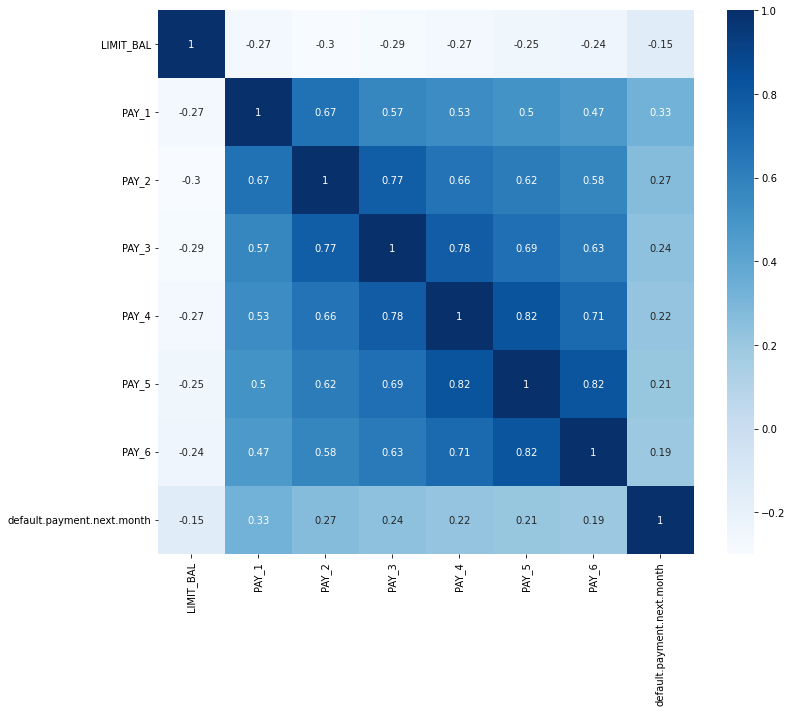

In [12]:
import seaborn as sns

plt.figure(figsize=(12, 10))
sns.heatmap(cor_core, annot=True, cmap=plt.cm.Blues)
plt.show()

The correlation plot suggests the Repayment Status features are highly correlated. This makes sense because these features are lag features.

Next, we examine the distribution of LIMIT_BAL.

/Users/giangnguyen/opt/miniconda3/envs/573/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


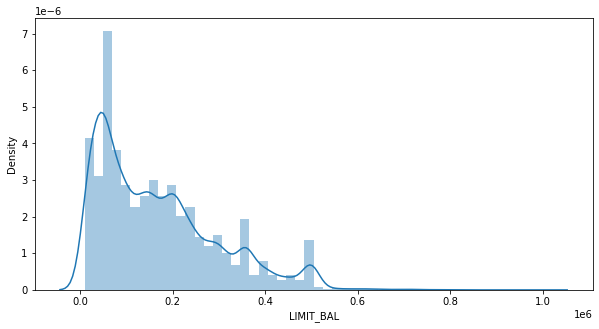

In [13]:
plt.figure(figsize=(10, 5))
sns.distplot(train_df.LIMIT_BAL)
plt.show()

The distribution plot shows that the limit balance is right-skewed, and the majority of clients are given the credit line ranging from 0 to 200,000 (NT dollar).

Lastly, we look at the distribution of the target variable.

In [14]:
train_df["default.payment.next.month"].value_counts(normalize=True)

0    0.776762
1    0.223238
Name: default.payment.next.month, dtype: float64

We do have a class imbalance in the data set since only 22% of the examples in the training set belong to the "default" class (class 1). We are more interested in the "default" class because it is more important to catch as many credit card clients who will default as possible so that the bank can stop offering them credit lines. Therefore, we decided to pick the f1-score as our most important metric.

In [15]:
scoring = ["accuracy", "recall", "precision", "f1", "average_precision"]

<br><br>

## (Optional) 4. Feature engineering <a name="4"></a>
<hr>
rubric={reasoning:1}

**Your tasks:**

1. Carry out feature engineering. In other words, extract new features relevant for the problem and work with your new feature set in the following exercises. You may have to go back and forth between feature engineering and preprocessing. 

<br><br>

## 5. Preprocessing and transformations <a name="5"></a>
<hr>
rubric={accuracy:6,reasoning:4}

**Your tasks:**

1. Identify different feature types and the transformations you would apply on each feature type. 
2. Define a column transformer, if necessary. 

**Answer:**

In [16]:
# 1. Identify feature types

drop_features = ["ID"]

categorical_features = ["MARRIAGE", "EDUCATION"]

binary_features = ["SEX"]

numeric_features = list(
    set(X_train.columns)
    - set(categorical_features)
    - set(binary_features)
    - set(drop_features)
)

**Reasoning:**
- drop_features: Drop ID as it is a unique identifier for each row that is unlikely to be useful. 
- categorical_features: MARRIAGE and EDUCATION are numbers to begin with but have categorical meanings. Note: EDUCATION looks like an already encoded ordinal column. However, the undefined/unknown values are problematic, and the documentation does not provide enough information on how to deal with them properly. Hence, we would encode this feature with OHE.
- binary_features: SEX is binary.
- numeric_features: Treat the rest as numeric and standardize them. Note: PAY_1 - PAY_6 look like already encoded ordinal features. Moreover, even though these features are collinear, it should not be a problem because we are using regularized models. Hence, I would keep all these features and treat them as numeric to apply scaling on.

In [17]:
# 2. Define a column transformer

numeric_transformer = make_pipeline(StandardScaler())

binary_transformer = make_pipeline(OneHotEncoder(drop="if_binary", dtype=int))

categorical_transformer = make_pipeline(OneHotEncoder(handle_unknown="ignore", sparse=False))

preprocessor = make_column_transformer(
    (numeric_transformer, numeric_features),
    (binary_transformer, binary_features),
    (categorical_transformer, categorical_features),
    ("drop", drop_features),
)

In [18]:
# 3. Transform training set
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 ['PAY_AMT6', 'BILL_AMT5', 'PAY_4', 'PAY_AMT3',
                                  'PAY_2', 'BILL_AMT2', 'PAY_AMT2', 'BILL_AMT6',
                                  'PAY_6', 'AGE', 'PAY_AMT1', 'BILL_AMT1',
                                  'PAY_AMT5', 'PAY_AMT4', 'PAY_5', 'PAY_1',
                                  'BILL_AMT3', 'PAY_3', 'BILL_AMT4',
                                  'LIMIT_BAL']),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                dtype=<class 'int'>))]),
                                 ['SEX']),
                                ('pipeline-3',
         

<br><br>

## 6. Baseline model <a name="6"></a>
<hr>
rubric={accuracy:2}

**Your tasks:**
1. Try `scikit-learn`'s baseline model and report results.

**Answer:** 

We will use DummyClassifier as the baseline model.

In [19]:
results = {}

In [20]:
# The code is adapted from lectures and previous labs:

def mean_std_cross_val_scores(model, X_train, y_train, **kwargs):
    """
    Returns mean and std of cross validation

    Parameters
    ----------
    model :
        scikit-learn model
    X_train : numpy array or pandas DataFrame
        X in the training data
    y_train :
        y in the training data

    Returns
    ----------
        pandas Series with mean scores from cross_validation
    """

    scores = cross_validate(model, X_train, y_train, **kwargs)

    mean_scores = pd.DataFrame(scores).mean()
    std_scores = pd.DataFrame(scores).std()
    out_col = []

    for i in range(len(mean_scores)):
        out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))

    return pd.Series(data=out_col, index=mean_scores.index)

In [21]:
dummy_model = DummyClassifier(strategy="stratified")
results["Dummy"] = mean_std_cross_val_scores(
    dummy_model, X_train, y_train, return_train_score=True, scoring=scoring
)
pd.DataFrame(results)

,Dummy
fit_time,0.002 (+/- 0.001)
score_time,0.008 (+/- 0.001)
test_accuracy,0.657 (+/- 0.004)
train_accuracy,0.650 (+/- 0.004)
test_recall,0.227 (+/- 0.006)
train_recall,0.222 (+/- 0.003)
test_precision,0.229 (+/- 0.006)
train_precision,0.219 (+/- 0.006)
test_f1,0.228 (+/- 0.006)
train_f1,0.220 (+/- 0.005)


The test scores are very low. 

<br><br>

## 7. Linear models <a name="7"></a>
<hr>
rubric={accuracy:6,reasoning:4}

**Your tasks:**

1. Try a linear model as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the regularization hyperparameter. 
3. Report cross-validation scores along with standard deviation. 
4. Summarize your results.

**Answer:**

We will use LogisticRegression as our linear model.

Note: As seen above, we have a class imbalance in the data set. Hence, we apply `class_weight="balanced"` before hyperparameter optimization to deal with the class imbalance. Since doing so results in much better scores, we will fix this in hyperparamter optimization and search for other hyperparameters.

In [22]:
# 1. Run logistic regression without hyperparameter optimization

pipe_lr = make_pipeline(
    preprocessor, LogisticRegression(max_iter=1000, class_weight="balanced", random_state=123)
)
results["Logistic Regression"] = mean_std_cross_val_scores(
    pipe_lr, X_train, y_train, return_train_score=True, scoring=scoring
)
pd.DataFrame(results)

,Dummy,Logistic Regression
fit_time,0.002 (+/- 0.001),0.531 (+/- 0.076)
score_time,0.008 (+/- 0.001),0.030 (+/- 0.004)
test_accuracy,0.657 (+/- 0.004),0.683 (+/- 0.007)
train_accuracy,0.650 (+/- 0.004),0.686 (+/- 0.003)
test_recall,0.227 (+/- 0.006),0.646 (+/- 0.021)
train_recall,0.222 (+/- 0.003),0.649 (+/- 0.005)
test_precision,0.229 (+/- 0.006),0.378 (+/- 0.007)
train_precision,0.219 (+/- 0.006),0.381 (+/- 0.003)
test_f1,0.228 (+/- 0.006),0.477 (+/- 0.009)
train_f1,0.220 (+/- 0.005),0.480 (+/- 0.003)


In [23]:
# 2. Carry out hyperparameter optimization

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform

param_dist_lr = {
    "logisticregression__C": loguniform(1e-3, 1e3),
}

search_lr = RandomizedSearchCV(
    pipe_lr,
    param_dist_lr,
    n_iter=50,
    verbose=1,
    n_jobs=-1,
    return_train_score=True,
    scoring="f1",
    random_state=123,
)

search_lr.fit(X_train, y_train);

Fitting 5 folds for each of 50 candidates, totalling 250 fits


In [24]:
search_lr.best_params_

{'logisticregression__C': 0.011290431413903904}

In [25]:
search_lr.best_score_

0.47983419889173823

In [26]:
# 3. Report scores

results["Tuned Logistic Regression"] = mean_std_cross_val_scores(
    search_lr.best_estimator_, X_train, y_train, return_train_score=True, scoring=scoring
)
pd.DataFrame(results)

,Dummy,Logistic Regression,Tuned Logistic Regression
fit_time,0.002 (+/- 0.001),0.531 (+/- 0.076),0.128 (+/- 0.018)
score_time,0.008 (+/- 0.001),0.030 (+/- 0.004),0.032 (+/- 0.007)
test_accuracy,0.657 (+/- 0.004),0.683 (+/- 0.007),0.689 (+/- 0.007)
train_accuracy,0.650 (+/- 0.004),0.686 (+/- 0.003),0.690 (+/- 0.003)
test_recall,0.227 (+/- 0.006),0.646 (+/- 0.021),0.642 (+/- 0.021)
train_recall,0.222 (+/- 0.003),0.649 (+/- 0.005),0.643 (+/- 0.004)
test_precision,0.229 (+/- 0.006),0.378 (+/- 0.007),0.383 (+/- 0.008)
train_precision,0.219 (+/- 0.006),0.381 (+/- 0.003),0.384 (+/- 0.004)
test_f1,0.228 (+/- 0.006),0.477 (+/- 0.009),0.480 (+/- 0.009)
train_f1,0.220 (+/- 0.005),0.480 (+/- 0.003),0.481 (+/- 0.004)


**Summarize the results:**
- The best hyperparameter found by our random search is C = 0.01 with a validation f1-score of 0.48.
- The tuned logistic regression model seems to not improve much compared to the model without hyperparameter optimization. In fact, recall decreases a bit while accuracy, precision, and f1 slightly increase.

<br><br>

## 8. Different models <a name="8"></a>
<hr>
rubric={accuracy:10,reasoning:6}

**Your tasks:**
1. Try at least 3 other models aside from a linear model. 
2. Summarize your results in terms of overfitting/underfitting and fit and score times. Can you beat a linear model? 

**Answer:**

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from lightgbm.sklearn import LGBMClassifier

pipe_rf = make_pipeline(preprocessor, RandomForestClassifier(class_weight="balanced", random_state=123))
pipe_knn = make_pipeline(preprocessor, KNeighborsClassifier())
pipe_lgbm = make_pipeline(preprocessor, LGBMClassifier(class_weight="balanced", random_state=123))

models = {
    "Random Forest": pipe_rf,
    "KNN": pipe_knn,
    "LightGBM": pipe_lgbm
}

In [28]:
for (name, model) in models.items():
    results[name] = mean_std_cross_val_scores(
        model, X_train, y_train, return_train_score=True, scoring=scoring
    )
pd.DataFrame(results)

,Dummy,Logistic Regression,Tuned Logistic Regression,Random Forest,KNN,LightGBM
fit_time,0.002 (+/- 0.001),0.531 (+/- 0.076),0.128 (+/- 0.018),4.065 (+/- 0.191),0.025 (+/- 0.003),0.320 (+/- 0.076)
score_time,0.008 (+/- 0.001),0.030 (+/- 0.004),0.032 (+/- 0.007),0.222 (+/- 0.029),3.959 (+/- 0.265),0.053 (+/- 0.006)
test_accuracy,0.657 (+/- 0.004),0.683 (+/- 0.007),0.689 (+/- 0.007),0.812 (+/- 0.006),0.793 (+/- 0.005),0.765 (+/- 0.007)
train_accuracy,0.650 (+/- 0.004),0.686 (+/- 0.003),0.690 (+/- 0.003),0.999 (+/- 0.000),0.844 (+/- 0.001),0.824 (+/- 0.003)
test_recall,0.227 (+/- 0.006),0.646 (+/- 0.021),0.642 (+/- 0.021),0.341 (+/- 0.012),0.355 (+/- 0.012),0.615 (+/- 0.014)
train_recall,0.222 (+/- 0.003),0.649 (+/- 0.005),0.643 (+/- 0.004),1.000 (+/- 0.000),0.471 (+/- 0.004),0.775 (+/- 0.009)
test_precision,0.229 (+/- 0.006),0.378 (+/- 0.007),0.383 (+/- 0.008),0.649 (+/- 0.031),0.559 (+/- 0.017),0.480 (+/- 0.012)
train_precision,0.219 (+/- 0.006),0.381 (+/- 0.003),0.384 (+/- 0.004),0.997 (+/- 0.000),0.733 (+/- 0.004),0.580 (+/- 0.005)
test_f1,0.228 (+/- 0.006),0.477 (+/- 0.009),0.480 (+/- 0.009),0.447 (+/- 0.015),0.434 (+/- 0.013),0.539 (+/- 0.013)
train_f1,0.220 (+/- 0.005),0.480 (+/- 0.003),0.481 (+/- 0.004),0.999 (+/- 0.000),0.573 (+/- 0.003),0.664 (+/- 0.004)


**Summarize the results:**
- Regarding score, LightGBM has the highest validation f1 score while KNN has the lowest. Hence, we can see that not all non-linear model can beat the linear model. 
- Regarding overfitting/ underfitting, Random Forest is overfitting badly. 
- Regarding fit and score time, most models are quite quick, except Random Forest takes a while to fit and KNN takes a while to score. 

Overall, LightGBM is the best performing model as it achieves the best score, is fast, and does not overfit/underfit.  

<br><br>

## (Optional) 9. Feature selection <a name="9"></a>
<hr>
rubric={reasoning:1}

**Your tasks:**

Make some attempts to select relevant features. You may try `RFECV`, forward selection or L1 regularization for this. Do the results improve with feature selection? Summarize your results. If you see improvements in the results, keep feature selection in your pipeline. If not, you may abandon it in the next exercises. 

<br><br>

## 10. Hyperparameter optimization <a name="10"></a>
<hr>
rubric={accuracy:6,reasoning:4}

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. In at least one case you should be optimizing multiple hyperparameters for a single model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods. 
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize) 

**Answer:**

We will perform hyperparameter optimization on the best-performing model LightGBM.

In [29]:
import numpy as np
param_dist_lgbm = {
    "lgbmclassifier__max_depth": np.arange(1, 20, 2),
    "lgbmclassifier__num_leaves": np.arange(20, 80, 5),
    "lgbmclassifier__max_bin": np.arange(200, 300, 20),
}

search_lgbm = RandomizedSearchCV(
    pipe_lgbm,
    param_dist_lgbm,
    n_iter=50,
    verbose=1,
    n_jobs=-1,
    return_train_score=True,
    scoring="f1",
    random_state=123,
)

search_lgbm.fit(X_train, y_train);

Fitting 5 folds for each of 50 candidates, totalling 250 fits


In [30]:
results["Tuned LightGBM"] = mean_std_cross_val_scores(
    search_lgbm.best_estimator_, X_train, y_train, return_train_score=True, scoring=scoring
)
pd.DataFrame(results)

,Dummy,Logistic Regression,Tuned Logistic Regression,Random Forest,KNN,LightGBM,Tuned LightGBM
fit_time,0.002 (+/- 0.001),0.531 (+/- 0.076),0.128 (+/- 0.018),4.065 (+/- 0.191),0.025 (+/- 0.003),0.320 (+/- 0.076),0.259 (+/- 0.041)
score_time,0.008 (+/- 0.001),0.030 (+/- 0.004),0.032 (+/- 0.007),0.222 (+/- 0.029),3.959 (+/- 0.265),0.053 (+/- 0.006),0.053 (+/- 0.006)
test_accuracy,0.657 (+/- 0.004),0.683 (+/- 0.007),0.689 (+/- 0.007),0.812 (+/- 0.006),0.793 (+/- 0.005),0.765 (+/- 0.007),0.768 (+/- 0.008)
train_accuracy,0.650 (+/- 0.004),0.686 (+/- 0.003),0.690 (+/- 0.003),0.999 (+/- 0.000),0.844 (+/- 0.001),0.824 (+/- 0.003),0.801 (+/- 0.004)
test_recall,0.227 (+/- 0.006),0.646 (+/- 0.021),0.642 (+/- 0.021),0.341 (+/- 0.012),0.355 (+/- 0.012),0.615 (+/- 0.014),0.625 (+/- 0.016)
train_recall,0.222 (+/- 0.003),0.649 (+/- 0.005),0.643 (+/- 0.004),1.000 (+/- 0.000),0.471 (+/- 0.004),0.775 (+/- 0.009),0.698 (+/- 0.006)
test_precision,0.229 (+/- 0.006),0.378 (+/- 0.007),0.383 (+/- 0.008),0.649 (+/- 0.031),0.559 (+/- 0.017),0.480 (+/- 0.012),0.485 (+/- 0.014)
train_precision,0.219 (+/- 0.006),0.381 (+/- 0.003),0.384 (+/- 0.004),0.997 (+/- 0.000),0.733 (+/- 0.004),0.580 (+/- 0.005),0.543 (+/- 0.008)
test_f1,0.228 (+/- 0.006),0.477 (+/- 0.009),0.480 (+/- 0.009),0.447 (+/- 0.015),0.434 (+/- 0.013),0.539 (+/- 0.013),0.546 (+/- 0.014)
train_f1,0.220 (+/- 0.005),0.480 (+/- 0.003),0.481 (+/- 0.004),0.999 (+/- 0.000),0.573 (+/- 0.003),0.664 (+/- 0.004),0.611 (+/- 0.005)


In [31]:
search_lgbm.best_params_

{'lgbmclassifier__num_leaves': 60,
 'lgbmclassifier__max_depth': 5,
 'lgbmclassifier__max_bin': 240}

In [32]:
search_lgbm.best_score_

0.5459147030871935

The best hyperparameters found by our random search are: num_leaves = 0.01129, max_depth=5, max_bin=240 with a validation f1-score of 0.546.

<br><br>

## 11. Interpretation and feature importances <a name="1"></a>
<hr>
rubric={accuracy:6,reasoning:4}

**Your tasks:**

1. Use the methods we saw in class (e.g., `eli5`, `shap`), or any other methods of your choice, to examine the most important features of one of the non-linear models. 
2. Summarize your observations. 

**Answer:**

In [33]:
import shap

In [34]:
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 ['PAY_AMT6', 'BILL_AMT5', 'PAY_4', 'PAY_AMT3',
                                  'PAY_2', 'BILL_AMT2', 'PAY_AMT2', 'BILL_AMT6',
                                  'PAY_6', 'AGE', 'PAY_AMT1', 'BILL_AMT1',
                                  'PAY_AMT5', 'PAY_AMT4', 'PAY_5', 'PAY_1',
                                  'BILL_AMT3', 'PAY_3', 'BILL_AMT4',
                                  'LIMIT_BAL']),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                dtype=<class 'int'>))]),
                                 ['SEX']),
                                ('pipeline-3',
         

In [35]:
preprocessor.fit(X_train, y_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 ['PAY_AMT6', 'BILL_AMT5', 'PAY_4', 'PAY_AMT3',
                                  'PAY_2', 'BILL_AMT2', 'PAY_AMT2', 'BILL_AMT6',
                                  'PAY_6', 'AGE', 'PAY_AMT1', 'BILL_AMT1',
                                  'PAY_AMT5', 'PAY_AMT4', 'PAY_5', 'PAY_1',
                                  'BILL_AMT3', 'PAY_3', 'BILL_AMT4',
                                  'LIMIT_BAL']),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                dtype=<class 'int'>))]),
                                 ['SEX']),
                                ('pipeline-3',
         

In [36]:
ohe_feature_names = (
    preprocessor
    .named_transformers_["pipeline-3"]
    .named_steps["onehotencoder"]
    .get_feature_names_out(categorical_features)
    .tolist()
)

feature_names = numeric_features + binary_features + ohe_feature_names

In [37]:
X_train_enc = pd.DataFrame(
    data=preprocessor.transform(X_train),
    columns=feature_names,
    index=X_train.index,
)
X_train_enc.head()

,PAY_AMT6,BILL_AMT5,PAY_4,PAY_AMT3,PAY_2,BILL_AMT2,PAY_AMT2,BILL_AMT6,PAY_6,AGE,...,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,EDUCATION_0,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6
16395,0.097991,-0.494781,0.192754,-0.234603,0.114774,-0.293394,-0.040229,-0.587035,0.257059,0.054187,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
21448,2.562606,1.805461,0.192754,6.785208,-0.722412,-0.679495,3.739796,1.327534,0.257059,-0.597108,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
20034,-0.289117,-0.661045,-1.518801,-0.289017,-1.559598,-0.688319,-0.270403,-0.650908,-1.485154,0.922579,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
25755,-0.195169,0.501203,0.192754,-0.060260,0.114774,0.752583,-0.018028,0.144527,0.257059,-0.597108,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1438,-0.206319,-0.204599,0.192754,-0.223720,1.789147,-0.031399,-0.206185,-0.191104,0.257059,2.008070,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [38]:
X_test_enc = pd.DataFrame(
    data=preprocessor.transform(X_test),
    columns=feature_names,
    index=X_test.index,
)
X_test_enc.head()

,PAY_AMT6,BILL_AMT5,PAY_4,PAY_AMT3,PAY_2,BILL_AMT2,PAY_AMT2,BILL_AMT6,PAY_6,AGE,...,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,EDUCATION_0,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6
25665,0.262869,0.058763,0.192754,-0.289017,0.114774,-0.346448,-0.224533,-0.336826,0.257059,-1.031304,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
16464,-0.178389,0.162513,0.192754,-0.180189,0.114774,0.293371,-0.173801,0.179619,0.257059,2.550815,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
22386,-0.233918,2.086523,1.904308,-0.289017,1.789147,1.536341,0.027750,2.217873,1.999273,-0.597108,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10149,-0.289117,-0.660751,-1.518801,-0.289017,-1.559598,-0.677772,-0.270403,-0.650606,-1.485154,0.596932,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8729,-0.270901,-0.506842,0.192754,-0.271006,0.114774,-0.575543,-0.217653,-0.489210,0.257059,0.814030,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [39]:
pipe_lgbm.fit(X_train, y_train);

In [40]:
lgbm_explainer = shap.TreeExplainer(pipe_lgbm.named_steps["lgbmclassifier"])
train_lgbm_shap_values = lgbm_explainer.shap_values(X_train_enc)

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


In [41]:
# We are only extracting shapely values for the first 100 test examples for speed.
test_lgbm_shap_values = lgbm_explainer.shap_values(X_test_enc[:100])

In [42]:
shap.initjs()

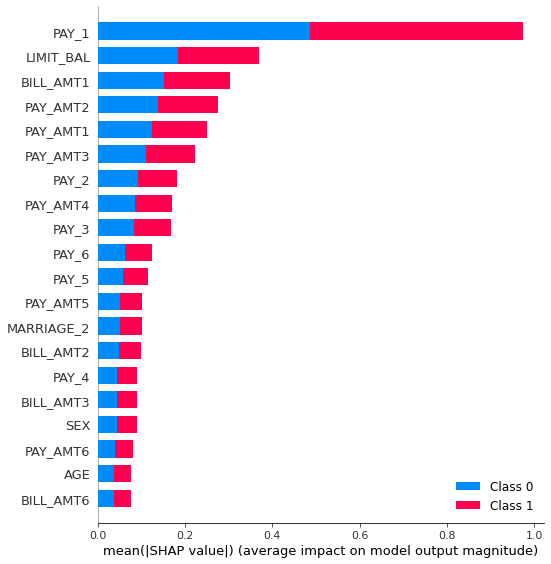

In [43]:
shap.summary_plot(train_lgbm_shap_values, X_train_enc)

**Summary of observations:**
- The plot shows global feature importances, where the features are ranked in descending order of feature importances. 
- Colour shows the class of feature (red for default payment and blue for non-default payment)
- PAY_1 is likely the most important feature while BILL_AMT6 is likely the least important one. 

<br><br>

## 12. Results on the test set <a name="12"></a>
<hr>

rubric={accuracy:6,reasoning:4}

**Your tasks:**

1. Try your best performing model on the test data and report test scores. 
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias? 
3. Take one or two test predictions and explain them with SHAP force plots.  

**Answer:**

1. Try on test data and report test scores.

In [44]:
best_lgbm = search_lgbm.best_estimator_

In [45]:
best_lgbm.predict(X_test)

array([0, 0, 1, ..., 1, 1, 1])

In [46]:
f1_score(y_test, best_lgbm.predict(X_test))

0.5299528831052278

2. The test score agrees with the validation score from Section 10. I would trust the result because the test score of 0.53 is just slightly lower than validation score of 0.546. Therefore, I think there is no issue with optimization bias in this case. 

3. Test predictions and explain with SHAP force plots.

In [47]:
X_train_enc = X_train_enc.round(3)
X_test_enc = X_test_enc.round(3)

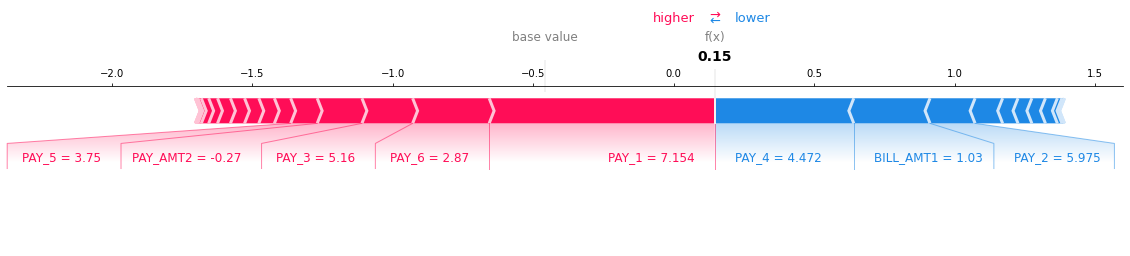

In [48]:
shap.force_plot(
    lgbm_explainer.expected_value[1],
    test_lgbm_shap_values[1][31,:],
    X_test_enc.iloc[31, :],
    matplotlib=True,
)

- The raw model score is higher than the base value so the prediction is default (1) because this example was pushed higher by all the factors shown in red such as PAY_1, PAY_6.
- Meanwhile, PAY_4, BILL_AMT1 are pushing the prediction towards lower score.

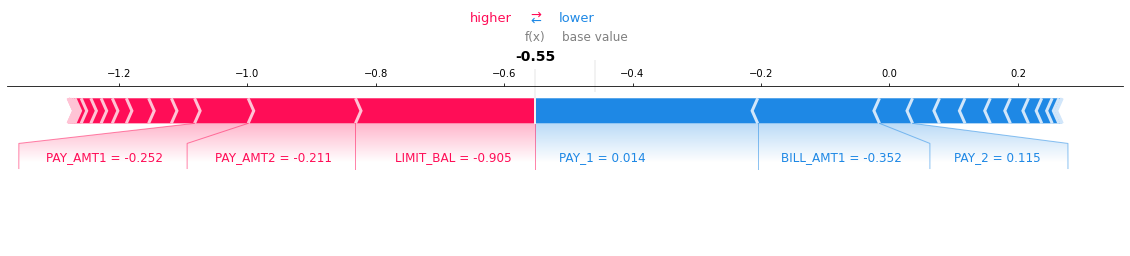

In [49]:
shap.force_plot(
    lgbm_explainer.expected_value[1],
    test_lgbm_shap_values[1][6,:],
    X_test_enc.iloc[6, :],
    matplotlib=True,
)

- The raw model score is lower than the base value so the prediction is non-default (0) because this example was pushed lower by all the factors shown in blue such as PAY_1, BILL_AMT1.
- Meanwhile, LIMIT_BAL, PAY_AMT2 are pushing the prediction towards higher score.

<br><br>

## 13. Summary of results <a name="13"></a>
<hr>
rubric={reasoning:12}

Imagine that you want to present the summary of these results to your boss and co-workers. 

**Your tasks:**

1. Create a table summarizing important results. 
2. Write concluding remarks.
3. Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 
3. Report your final test score along with the metric you used at the top of this notebook in the [Submission instructions section](#si).

**Answer:**

1. Summary table

In [50]:
models = {
    "Dummy": dummy_model,
    "Logistic Regression": pipe_lr,
    "Tuned Logistic Regression": search_lr.best_estimator_,
    "Random Forest": pipe_rf,
    "KNN": pipe_knn,
    "LGBM": pipe_lgbm,
    "Best LightGBM": best_lgbm
}

In [51]:
important_scores = ["f1"]
final_result = {}
for (name, model) in models.items():
    final_result[name] = mean_std_cross_val_scores(
        model, 
        X_train, 
        y_train, 
        return_train_score=True,
        scoring=important_scores
    )

pd.DataFrame(final_result)

,Dummy,Logistic Regression,Tuned Logistic Regression,Random Forest,KNN,LGBM,Best LightGBM
fit_time,0.004 (+/- 0.003),0.479 (+/- 0.027),0.120 (+/- 0.008),3.948 (+/- 0.369),0.026 (+/- 0.004),0.578 (+/- 0.311),0.206 (+/- 0.012)
score_time,0.003 (+/- 0.000),0.014 (+/- 0.002),0.013 (+/- 0.001),0.105 (+/- 0.015),1.802 (+/- 0.135),0.026 (+/- 0.004),0.024 (+/- 0.002)
test_f1,0.227 (+/- 0.006),0.477 (+/- 0.009),0.480 (+/- 0.009),0.447 (+/- 0.015),0.434 (+/- 0.013),0.539 (+/- 0.013),0.546 (+/- 0.014)
train_f1,0.224 (+/- 0.008),0.480 (+/- 0.003),0.481 (+/- 0.004),0.999 (+/- 0.000),0.573 (+/- 0.003),0.664 (+/- 0.004),0.611 (+/- 0.005)


2. Concluding remarks: 
- Best and worst performing models: 
    - With default hyperparameters for all models, the LGBM model seems to be performing best, whereas KNN seems to be performing worst.
    - With hyper parameters optimization, the best hyperparameters found by our random search for LGBM model are: num_leaves = 0.01129, max_depth=5, max_bin=240 with a validation f1-score of 0.546.
    
- Overfitting/underfitting:
    - Random Forest model seems to overfit; the training score is high and the gap between train and validation score f1 is big compared to other models. (Of course, our baseline model, dummy regressor, is also underfitting.)
    - All other models seem to underfit; the training score is low and the gap between train and validation score is not that big.

- Fit time
    - Random Forest model is much slower compared to other models. 
    - KNN performs worst but it fits much faster than other models.

- Score time
    - Scoring is fast for almost all models except KNN.

- Stability of scores
    - The scores look more or less stable with std in the range 0.009 to 0.016 for f1 score.

3. Due to time limit, there are still rooms for improvements in our mini project as the f1 score of the best model is not quite satisfactory. Some ideas we could do that would potentially improve the performance/interpretability:
    - Try other models (such as SVC)
    - Implement feature engineering such as polynomial features 
    - Try feature selection such as L1 regularization

4. Test score: 0.53 - Metric: f1

<br><br>

## (Optional) 14. Creating a data analysis pipeline <a name="14"></a>
rubric={reasoning:2}

**Your tasks:**
- In 522 you learned how build a reproducible data analysis pipeline. Convert this notebook into scripts and create a reproducible data analysis pipeline with appropriate documentation. 

<br><br>

## (Optional) 15. Your takeaway from the course <a name="15"></a>
<hr>
rubric={reasoning:1}

**Your tasks:**

What is your biggest takeaway from this course? 

**Answer:** 
The biggest takeaway of our group from this course is: 
- To define and use evaluation metrics for classification and regression, 
- To learn the importance of feature engineering in building machine learning models.
- To learn the importance of interpretability in Machine Learning. 

<br><br>

**PLEASE READ BEFORE YOU SUBMIT:** 

When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from "1" will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Push all your work to your GitHub lab repository. 
4. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 
5. Make sure that the plots and output are rendered properly in your submitted file. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb so that the TAs can view your submission on Gradescope. 

Well done!! Have a great weekend! 